## Disease Prediction: NBC, KNN, SVM, and Ensemble Learning

<b>Problem Set</b>: 

In this project, naive Bayes classifier, K Nearest Neighbor, Support Vector Machine (with both linear and non-linear kernel functions), Random Forest and Gradient Boosting Classifier are used to build a disease diagnosis model. It is a binary classification problem to predict whether or not a patient has a certain unspecified disease.

<b>Dataset</b>: 

Attributes’ information about the dataset (Disease Prediction Training.csv):
- Age: in years
- Gender: male/female
- Height: in unit of cm
- Weight: in unit of kg
- Low Blood Pressure: lower bound of blood pressure measurement
- High Blood Pressure: higher bound of blood pressure measurement
- Cholesterol: three cholesteral levels
- Glucose: three glucose levels
- Smoke: 1/0 regarding if the patient smokes
- Alcohol: 1/0 regarding if the patient drinks alcohol
- Exercise: 1/0 regarding if the patient exercises regularly
- Disease: The binary target variable. Does the patient have the disease?

## Section 0:  Import Libraries and Load Data

### Load packages and data

In [1]:
# import necessary libraries
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

# data formating 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',100)

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
# read libaries for machine learning model 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score, ShuffleSplit
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import cdist
from sklearn.pipeline import make_pipeline
from sklearn import model_selection 
from matplotlib.legend_handler import HandlerLine2D
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import roc_curve

In [632]:
# read data into a pandas dataframe
test_df = pd.read_csv("Disease Prediction Testing.csv",sep=',')
train_df = pd.read_csv("Disease Prediction Training.csv",sep=',')

### Reading and Displaying Data

#### Testing dataset has 21000 rows and 11 columns, aftering seting the ID column as index.
- Column Labels: Each column label is unique 
- Empty Column: All columns are non-null
- Type of Values: float64(1), int64(7), object(3)

In [245]:
test_df.set_index('ID', inplace=True)
test_df.head(3)

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise
ID,,,,,,,,,,,
0,44,female,160,59.0,100,80,high,normal,0,0,1
1,41,female,169,74.0,120,70,normal,normal,0,0,1
2,63,male,168,84.0,120,80,normal,high,0,0,1


In [246]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 0 to 20999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  21000 non-null  int64  
 1   Gender               21000 non-null  object 
 2   Height               21000 non-null  int64  
 3   Weight               21000 non-null  float64
 4   High Blood Pressure  21000 non-null  int64  
 5   Low Blood Pressure   21000 non-null  int64  
 6   Cholesterol          21000 non-null  object 
 7   Glucose              21000 non-null  object 
 8   Smoke                21000 non-null  int64  
 9   Alcohol              21000 non-null  int64  
 10  Exercise             21000 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 1.9+ MB


#### Training Dataset has 49,000 rows and 12 columns.
- Column Labels: Each column label is unique 
- Empty Column: All columns are non-null
- Type of Values: float64(1), int64(8), object(3)

In [6]:
train_df.head(3)

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
0,59,female,167,88.0,130,68,normal,normal,0,0,1,0
1,64,female,150,71.0,140,100,normal,normal,0,0,0,1
2,41,female,166,83.0,100,70,normal,normal,0,1,1,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49000 entries, 0 to 48999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  49000 non-null  int64  
 1   Gender               49000 non-null  object 
 2   Height               49000 non-null  int64  
 3   Weight               49000 non-null  float64
 4   High Blood Pressure  49000 non-null  int64  
 5   Low Blood Pressure   49000 non-null  int64  
 6   Cholesterol          49000 non-null  object 
 7   Glucose              49000 non-null  object 
 8   Smoke                49000 non-null  int64  
 9   Alcohol              49000 non-null  int64  
 10  Exercise             49000 non-null  int64  
 11  Disease              49000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 4.5+ MB


## Section1: Data Preparation

### 1.1 Derive Descriptive Statistics

#### 1.1.1 Distribution of Numeric Variables 
- **The type of variables we have:** Age is a discrete numeric varaible. Height, Weight, High Blood Pressure, and Low Blood Pressure are continous numeric variables. The last four variables - Smoke, Alcohol, Exercise, and Disease have binary values.
- **We have a balanced Dataset:** According to the distribution of the target variable "Disease", the number of cases of with disease and without disease are roughtly the same.
- **Problem1**: Here we notice that blood pressure has negative values, indicating that there are error data in the High Blood Pressure column.
- **Problem2**: The naming of "High Blood Pressure" and "Low Blood Pressure" have spaces.

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,49000.0,52.853306,6.763065,29.0,48.0,53.0,58.0,64.0
Height,49000.0,164.366878,8.216637,55.0,159.0,165.0,170.0,207.0
Weight,49000.0,74.190527,14.329934,10.0,65.0,72.0,82.0,200.0
High Blood Pressure,49000.0,128.698939,147.624582,-150.0,120.0,120.0,140.0,14020.0
Low Blood Pressure,49000.0,96.917367,200.368069,0.0,80.0,80.0,90.0,11000.0
Smoke,49000.0,0.088265,0.283683,0.0,0.0,0.0,0.0,1.0
Alcohol,49000.0,0.054245,0.226503,0.0,0.0,0.0,0.0,1.0
Exercise,49000.0,0.803204,0.397581,0.0,1.0,1.0,1.0,1.0
Disease,49000.0,0.499959,0.500005,0.0,0.0,0.0,1.0,1.0


#### We have a balance dataset.

In [636]:
# target variable
print(train_df['Disease'].value_counts(normalize=True, dropna=False))

0    0.500041
1    0.499959
Name: Disease, dtype: float64


In [247]:
# Find all numeric columns 
numeric_cols = train_df.select_dtypes([np.number]).columns

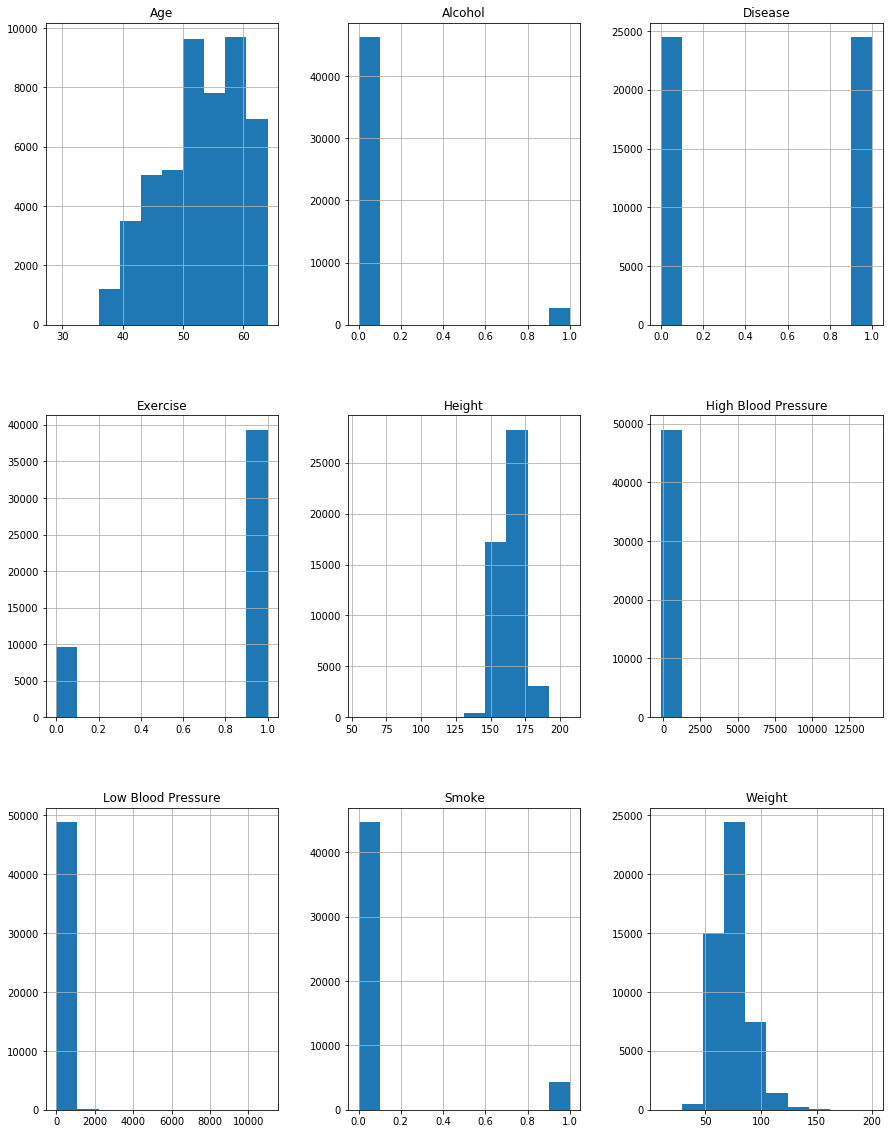

In [155]:
# create histograms
train_df[numeric_cols].hist(figsize=(15,20));

#### 1.1.2 Distribution of Categorical Variables
- Our 3 categorical variables - Gender, Cholesterol, and Glucose don't have 2, 3, and 3 unique values respectively.
- Given the small number of unqie values, we can later apply one-hot encoding to transform them from categorical variables to numeric variables. 

In [248]:
col_obj=[x for x in train_df.columns.to_list() if str(train_df[x].dtype) == 'object']
train_df[col_obj].describe().T

,count,unique,top,freq
Gender,49000,2,female,31863
Cholesterol,49000,3,normal,36676
Glucose,49000,3,normal,41652


In [633]:
print(train_df['Gender'].value_counts(normalize=True, dropna=False))

female    0.650265
male      0.349735
Name: Gender, dtype: float64


In [634]:
print(train_df['Cholesterol'].value_counts(normalize=True, dropna=False))

normal      0.748490
high        0.136837
too high    0.114673
Name: Cholesterol, dtype: float64


In [635]:
print(train_df['Glucose'].value_counts(normalize=True, dropna=False))

normal      0.850041
too high    0.075939
high        0.074020
Name: Glucose, dtype: float64


### 1.2 Potential Data Issues 

#### 1.2.1 Column names
- According to python's naming covention, column names with spaces is recommended be changed. 
- Replace the spaces in "High Blood Pressure" and "Low Blood Pressure" with "_".

In [616]:
# rename the high and low blood pressure column 
train_df.rename(columns={'High Blood Pressure':'High_Blood_Pressure',
                         'Low Blood Pressure':'Low_Blood_Pressure'},inplace=True)

In [160]:
train_df.head(3)

,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
0,59,female,167,88.0,130,68,normal,normal,0,0,1,0
1,64,female,150,71.0,140,100,normal,normal,0,0,0,1
2,41,female,166,83.0,100,70,normal,normal,0,1,1,0


#### 1.2.2 Missing Values
- No missing values are found.

In [161]:
train_df.isnull().sum(axis=0)

Age                    0
Gender                 0
Height                 0
Weight                 0
High_Blood_Pressure    0
Low_Blood_Pressure     0
Cholesterol            0
Glucose                0
Smoke                  0
Alcohol                0
Exercise               0
Disease                0
dtype: int64

#### 1.2.3 Duplicates
- We delete duplicates becuase they don't provide us addtional information.

In [617]:
if train_df.duplicated().sum()==0:
    print('No duplicated rows')
else:
    print('There are duplicates rows in the dataset.')

There are duplicates rows in the dataset.


In [618]:
train_df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", train_df.shape[0])

Number of rows after removing duplicates: 47248


In [619]:
print("Number of duplicate rows removed:", 49000-train_df.shape[0])

Number of duplicate rows removed: 1752


#### 1.2.3 Data Outliers
- **Do we have outliers?** 
    - Columm High_Blood_Pressure and Low_Blood Pressure have siginificant number of outliers. 
- **Why do we need to take care of outliers here?** 
    - **Naive Bayes Algorthm:** Although Naive Bayes Algorthm is robust to noise and irrelevant attributes, in Gaussian Naive Bayes, outliers will affect the shape of the Gaussian distribution and have the usual effects on the mean etc. 
    - **KNN algorithm:** Classification accuracy of the KNN algorithm is found to be adversely affected by the presence of outliers in the experimental datasets. An outlier score based on rank difference can be assigned to the points in these datasets by taking into consideration the distance and density of their local neighborhood points.
    - **Support Vector Machine:** Generally, SVM is not very robust to outliers. Presence of a few outliers can lead to very bad global misclassification.
    - **Random Forest**: Outliers might affect the performance of random forest in two ways. 1. Whenever a decision tree is constructed, all of the points must be classified. This means that even outliers will get classified, and hence will affect the decision trees where they were selected during boosting. 2. Bootstrapping is a part of how a RandomForest does sub-sampling. Bootstrapping is susceptible to outliers.
    - ** Gradient Boosting**: Outliers can be bad for boosting because boosting builds each tree on previous trees' residuals/errors. Outliers will have much larger residuals than non-outliers, so gradient boosting will focus a disproportionate amount of its attention on those points.
- **To sum up, it makes sense to remove the outliers in this dataset.**

In [251]:
numeric_cols = train_df.select_dtypes([np.number]).columns

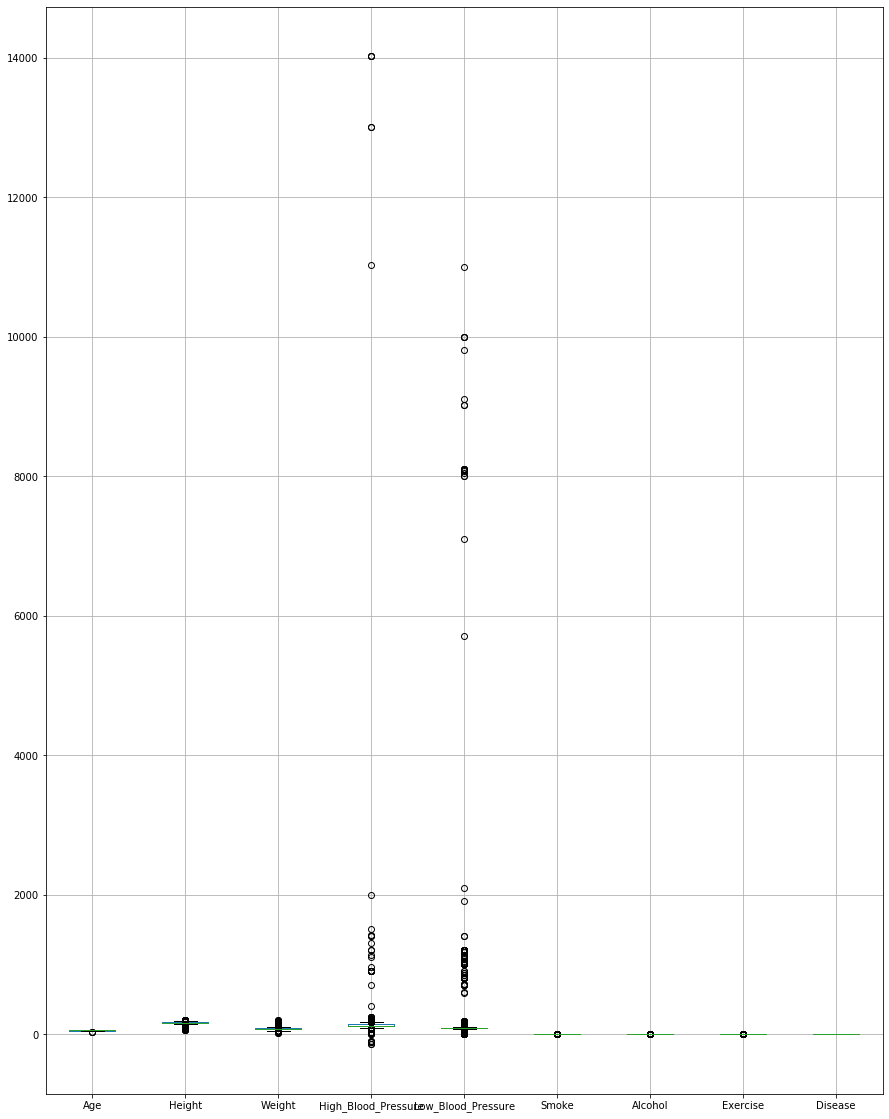

In [166]:
train_df[numeric_cols].boxplot(figsize=(15,20));

In [620]:
outliers_cols = ['Age','Height','Weight','High_Blood_Pressure','Low_Blood_Pressure']
for target_col in outliers_cols:
    '''
    For each numeric column, we use IQR method to identify outliers.
    Column values higher than the upper bound are set to upper bound values.
    Column values lower thatn the lower bound value are set to lower bound values.
    
    '''
    lower_quartile = train_df[target_col].quantile(0.25)
    upper_quartile = train_df[target_col].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    outlier_thresh = 1.5 * IQR
    # get upper/lower bound
    upper_bound = lower_quartile + outlier_thresh
    lower_bound = lower_quartile - outlier_thresh
    # winsorization
    train_df[target_col].loc[train_df[target_col] > upper_bound] = upper_bound
    train_df[target_col].loc[train_df[target_col] < lower_bound] = lower_bound

/Users/jieerchen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Data Distribution After Altering Outliers

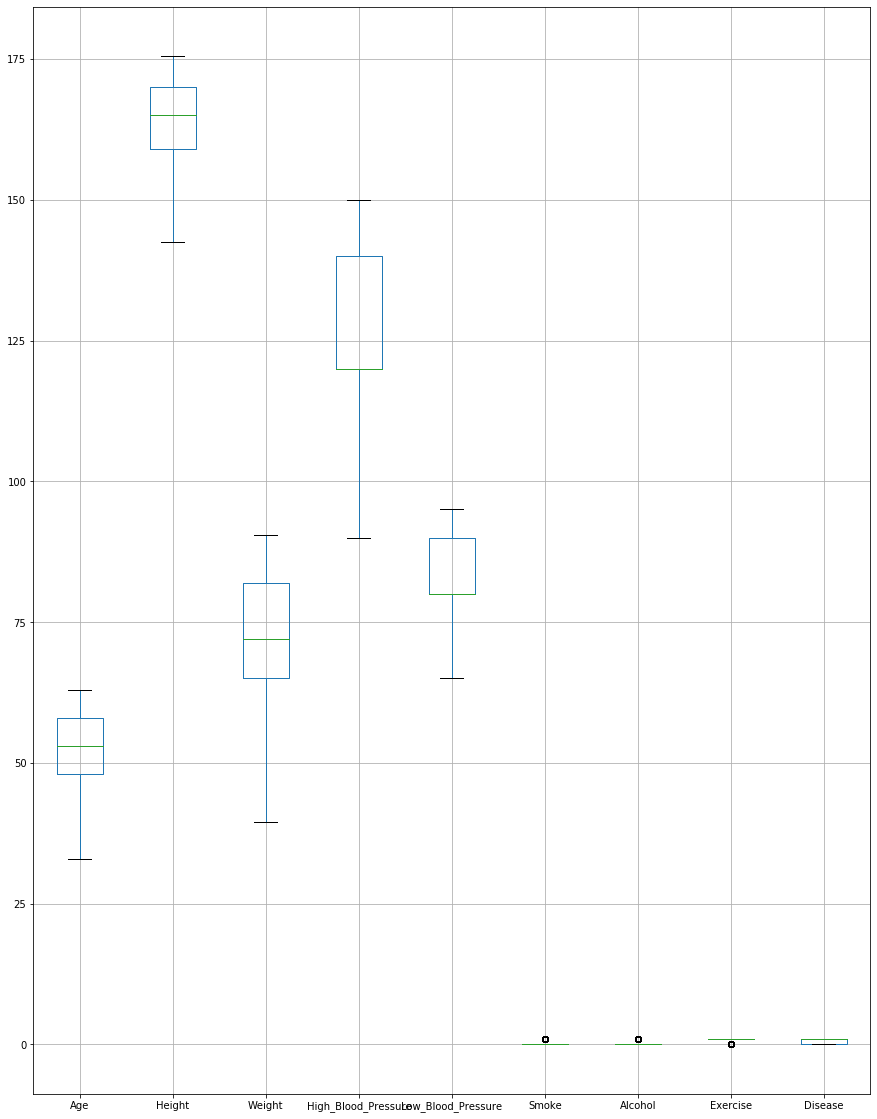

In [253]:
train_df[numeric_cols].boxplot(figsize=(15,20));

#### 1.2.4 Error Data: negative values in High Blood Pressure Column 
- Based on medical knowledge, blood pressure shouldn't have negative values.
- Previously we have 7 rows of negative blood pressure. 
- After taking care of the outliers, we now have no negative blood pressure values.

In [23]:
# number of rows with negative values 
negative_values = sum( n <0 for n in train_df['High_Blood_Pressure'].values.flatten())
print("Number of negatives values in High Blood Pressure Column:", negative_values)

Number of negatives values in High Blood Pressure Column: 0


### 1.4 Data pre-processing and selection

#### 1.4.1 Feture Encoding 

**Categorical Variable Gender**
    - Male:35%, Female: 65%
    - Male --> 0, Female --> 1

In [621]:
# Gender: male & female 
train_df['Gender'] = train_df['Gender'].map({'male': 0, 'female': 1})
train_df.head(3)

,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
0,59.0,1,167.0,88.0,130.0,68.0,normal,normal,0,0,1,0
1,63.0,1,150.0,71.0,140.0,95.0,normal,normal,0,0,0,1
2,41.0,1,166.0,83.0,100.0,70.0,normal,normal,0,1,1,0


**Categorical Variable Cholesterol**
- normal: 74.8%, high:13.7%, too high: 11.5%

In [622]:
# one hot encoding 
train_df = pd.get_dummies(train_df, columns=['Cholesterol'])
train_df.head(3)

,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Glucose,Smoke,Alcohol,Exercise,Disease,Cholesterol_high,Cholesterol_normal,Cholesterol_too high
0,59.0,1,167.0,88.0,130.0,68.0,normal,0,0,1,0,0,1,0
1,63.0,1,150.0,71.0,140.0,95.0,normal,0,0,0,1,0,1,0
2,41.0,1,166.0,83.0,100.0,70.0,normal,0,1,1,0,0,1,0


**Categorical Variable Glucose**
- normal: 85%, high: 7,4%, too high:7.59%

In [623]:
# one hot encoding 
train_df = pd.get_dummies(train_df, columns=['Glucose'])
train_df.head(3)

,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Smoke,Alcohol,Exercise,Disease,Cholesterol_high,Cholesterol_normal,Cholesterol_too high,Glucose_high,Glucose_normal,Glucose_too high
0,59.0,1,167.0,88.0,130.0,68.0,0,0,1,0,0,1,0,0,1,0
1,63.0,1,150.0,71.0,140.0,95.0,0,0,0,1,0,1,0,0,1,0
2,41.0,1,166.0,83.0,100.0,70.0,0,1,1,0,0,1,0,0,1,0


#### 1.4.2 Select features for the modeling. 
- Also we change the target data type to be integer, as it is a requirement by the skitlearn algorithm.

In [624]:
# Get target variable
y = train_df['Disease']
y[0:3]

0    0
1    1
2    0
Name: Disease, dtype: int64

In [625]:
# Target variable is balanced
print(y.sum() / y.shape[0] * 100)

50.956654249915346


In [626]:
# Get x variables
X = train_df.drop('Disease',axis=1)
X.head(3)

,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Smoke,Alcohol,Exercise,Cholesterol_high,Cholesterol_normal,Cholesterol_too high,Glucose_high,Glucose_normal,Glucose_too high
0,59.0,1,167.0,88.0,130.0,68.0,0,0,1,0,1,0,0,1,0
1,63.0,1,150.0,71.0,140.0,95.0,0,0,0,0,1,0,0,1,0
2,41.0,1,166.0,83.0,100.0,70.0,0,1,1,0,1,0,0,1,0


#### 1.4.3 Normalize the dataset
**Choose MinMaxScaler over StandardScaler**: 
   - MultinomialNB assumes that features have multinomial distribution which is a generalization of the binomial distribution. Neither binomial nor multinomial distributions can contain negative values. If we use StandardScaler to process the X varaibles, the data will follow Gaussian with zero mean and unit variance, leading to the presence of negative values.
   - Aftering applying MinMaxScaler, our data are range from 0 to 1.

In [260]:
from sklearn.preprocessing import MinMaxScaler
X = preprocessing.MinMaxScaler().fit(X).transform(X)
X[0:2]

array([[0.87, 1.  , 0.74, 0.95, 0.67, 0.1 , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 0.  , 1.  , 0.  ],
       [1.  , 1.  , 0.23, 0.62, 0.83, 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 0.  , 1.  , 0.  ]])

#### 1.4.4 Create training and validation dataset

In [261]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=16)
print("Train set:",X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (33073, 15) (33073,)
Test set: (14175, 15) (14175,)


### 1.5 Data Visualization

#### 1.5.1 Correlation Matrix
**Observation:** age(0.24), high blood pressure(0.45) and low blood pressure(0.36) have the highest correlation with the target variable Disease.

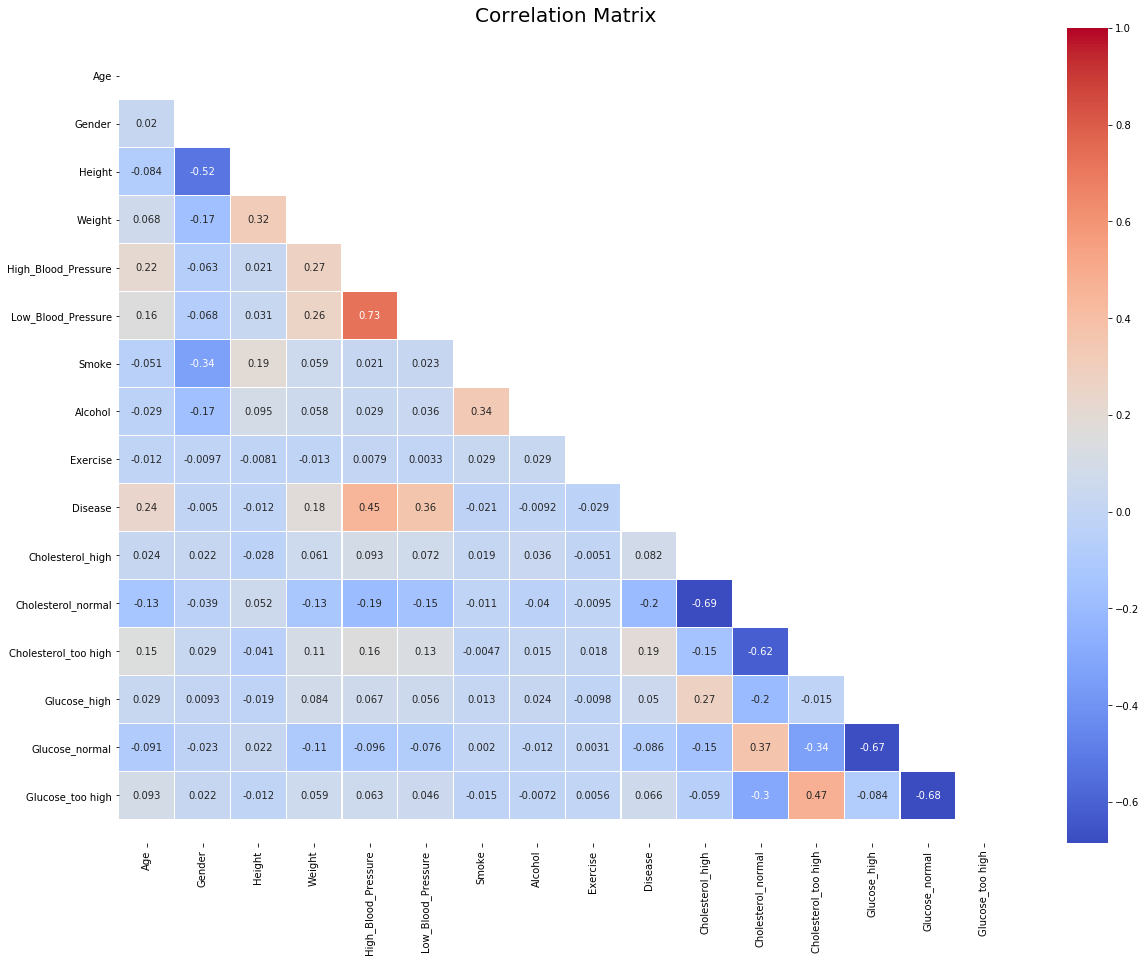

In [262]:
plt.figure(figsize = (20,15))
Matrix = np.triu(train_df.corr())
ax = sns.heatmap(train_df.corr(),  annot = True, fmt='.2g', mask=Matrix, cmap= 'coolwarm', linewidths=.2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix',y=-0.1, fontsize=20);

#### 1.5.2 Plot key columns to understand the data better 

**Observatio:** It seems like people aged over 55 are more likely to be diagnosed with disease.

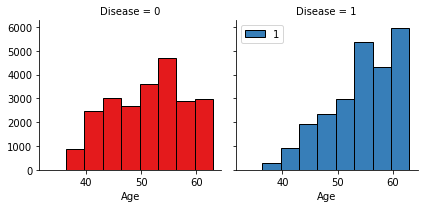

In [263]:
bins = np.linspace(train_df.Age.min(), train_df.Age.max(), 10)
g = sns.FacetGrid(train_df, col="Disease", hue="Disease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

**Observation:** When looking at the effect of age and weight together, it looks like that people weight over 75 and age over 55 have a higher risks of being diagnosed with disease.

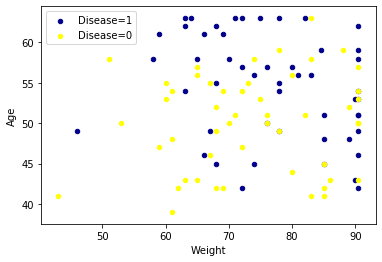

In [264]:
ax = train_df[train_df['Disease'] == 1][0:50].plot(kind='scatter', x='Weight', y='Age', color='DarkBlue', label='Disease=1');
train_df[train_df['Disease'] == 0][0:50].plot(kind='scatter', x='Weight', y='Age', color='Yellow', label='Disease=0', ax=ax);
plt.show()

## Section 2: Build, tune and evaluate cluster analysis and decision tree models

### 2.1 Navie Bayes Algorithm 
- Scikit-learn implements three naive Bayes variants based on the same number of different probabilistic distributions: Gaussian, multinomial, and Bernoulli.

#### 2.1.1 Gaussian NB Model
- Gaussian distribution is a continuous distribution characterized by its mean and variance.

In [540]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print(f"Accuracy: {round(metrics.accuracy_score(y_test, gnb_pred), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, gnb_pred), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, gnb_pred), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, gnb_pred), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, gnb_pred), 4)}")

Accuracy: 0.6874
Precision: 0.7367
Recall: 0.6034
F1-Score: 0.6634
ROC AUC Score: 0.6892


In [266]:
print (classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      6938
           1       0.74      0.60      0.66      7237

    accuracy                           0.69     14175
   macro avg       0.69      0.69      0.69     14175
weighted avg       0.70      0.69      0.69     14175



In [267]:
# Use predict_proba to get the probability results of Gaussain NB Model
y_pred_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, thresh = roc_curve(y_test, y_pred_gnb)

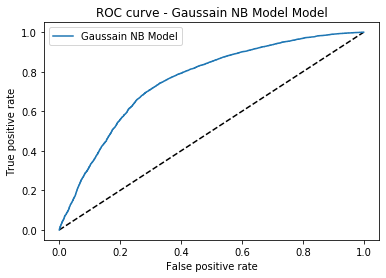

In [534]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gnb, tpr_gnb, label='Gaussain NB Model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Gaussain NB Model Model')
plt.legend(loc='best')
plt.show()

#### 2.1.2 Multinomial NB Model
- Multinomial distribution is a discrete distribution used whenever a feature must be represented by a whole number.

In [542]:
mnb = MultinomialNB(alpha=0.5)
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
print(f"Accuracy: {round(metrics.accuracy_score(y_test, mnb_pred), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, mnb_pred), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, mnb_pred), 4)}")
print(f"F1-score: {round(metrics.f1_score(y_test, mnb_pred), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, mnb_pred), 4)}")

Accuracy: 0.614
Precision: 0.6851
Recall: 0.4513
F1-score: 0.5442
ROC AUC Score: 0.6175


In [271]:
print (classification_report(y_test, mnb_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67      6938
           1       0.69      0.45      0.54      7237

    accuracy                           0.61     14175
   macro avg       0.63      0.62      0.60     14175
weighted avg       0.63      0.61      0.60     14175



In [272]:
# Use predict_proba to get the probability results of Multinomial NB Model
y_pred_mnb = mnb.predict_proba(X_test)[:, 1]
fpr_mnb, tpr_mnb, thresh = roc_curve(y_test, y_pred_mnb)

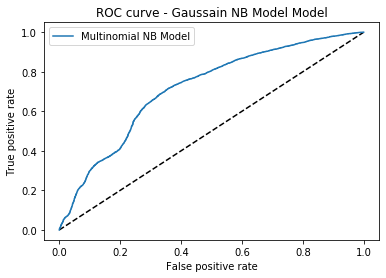

In [535]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_mnb, tpr_mnb, label='Multinomial NB Model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Gaussain NB Model Model')
plt.legend(loc='best')
plt.show()

#### 2.1.3 Bernoulli NB Model
- Bernoulli distribution is a binary distribution useful when a feature can be present or absent. 

In [541]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
print(f"Accuracy: {round(metrics.accuracy_score(y_test, bnb_pred), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, bnb_pred), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, bnb_pred), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, bnb_pred), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, bnb_pred), 4)}")

Accuracy: 0.5898
Precision: 0.6651
Recall: 0.396
F1-Score: 0.4964
ROC AUC Score: 0.594


In [277]:
print (classification_report(y_test, bnb_pred))

              precision    recall  f1-score   support

           0       0.56      0.79      0.65      6938
           1       0.67      0.40      0.50      7237

    accuracy                           0.59     14175
   macro avg       0.61      0.59      0.58     14175
weighted avg       0.61      0.59      0.57     14175



In [278]:
# Use predict_proba to get the probability results of Bernoulli NB Model
y_pred_bnb = bnb.predict_proba(X_test)[:, 1]
fpr_bnb, tpr_bnb, thresh = roc_curve(y_test, y_pred_bnb)

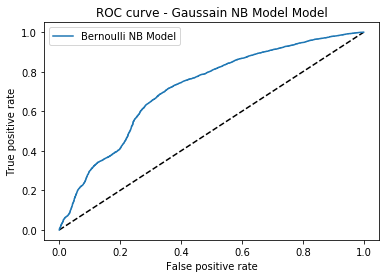

In [537]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_mnb, tpr_mnb, label='Bernoulli NB Model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Gaussain NB Model Model')
plt.legend(loc='best')
plt.show()

#### 2.1.4 Use 10-fold Cross Validation to help in identifying a case of overfitting


In [545]:
model_names = ['Gaussian NB Model','Multinomial NB Model','Bernoulli NB Model']
model_list = [gnb, mnb, bnb]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=10)
    print('Model accuracy_mean of ' + model_names[count] + ' is ' + str(round(cv_score.mean(),4)))
    print('Model accuracy_std of ' + model_names[count] + ' is ' + str(round(cv_score.std(),4)))
    count += 1

Model accuracy_mean of Gaussian NB Model is 0.6885
Model accuracy_std of Gaussian NB Model is 0.0108
Model accuracy_mean of Multinomial NB Model is 0.6109
Model accuracy_std of Multinomial NB Model is 0.0111
Model accuracy_mean of Bernoulli NB Model is 0.5882
Model accuracy_std of Bernoulli NB Model is 0.01


#### 2.1.6 Summary of NB model performance: 
- Gussain NB Model has the best performance among the three models.

In [543]:
nym_performance = {'Metrics': ['Accuracy','Precision','Recall','F1-Score','CV_mean','CV_std','AUC'], 
           'Gussain': [0.6874, 0.7367,0.6034,0.6634,0.6885,0.0108,0.6892],
           'Multilnomial':[0.614,0.6851,0.4513,0.5442,0.6109,0.0111,0.6175],
          'Bernoulli':[0.5898,0.6651,0.396,0.4964,0.5882,0.01, 0.594]}
nym_performance = pd.DataFrame(data= nym_performance)
nym_performance 

,Metrics,Gussain,Multilnomial,Bernoulli
0,Accuracy,0.6874,0.6140,0.5898
1,Precision,0.7367,0.6851,0.6651
2,Recall,0.6034,0.4513,0.3960
3,F1-Score,0.6634,0.5442,0.4964
4,CV_mean,0.6885,0.6109,0.5882
5,CV_std,0.0108,0.0111,0.0100
6,AUC,0.6892,0.6175,0.5940


### 2.2 K Nearest Neighbor (KNN)
- The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. It assumes that similar things exist in close proximity. In other words, similar things are near to each other.

#### 2.2.1 Base KNN Model

In [560]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(f"Accuracy of base KNN: {round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%")

Accuracy of base KNN: 69.22%


#### 2.2.2 Sensitivity Analysis 
- Number of neighbors (K) is a hyper parameter of the KNN model. As we decrease the value of K to 1, our predictions become less stable. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

#### Building the KNN models by assigning the value of K from 1 to 30

In [300]:
# Importing the KNN model
from sklearn.neighbors import KNeighborsClassifier

Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.63, 0.63, 0.67, 0.68, 0.69, 0.7 , 0.7 , 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72,
       0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72,
       0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72,
       0.72, 0.72, 0.72, 0.72, 0.72])

#### Plot model accuracy for different number of Neighbors¶
- The accury of the model increase sharping as K increase from 0 to around 20
- The variation of the accuracy is small after K reach around 20.

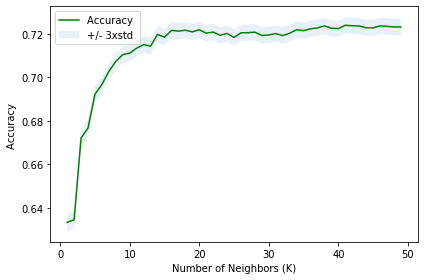

In [301]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

#### 2.2.3 More efficient parameter tuning using GridSearchCV: KNN
- **Number of neighbors (K)** 
    - To select the K that’s right for our data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.
    - If the number of neighbors is too large, the model will have high bias. If the number of neighors is too small, the model will have high variance (overfitting). We usually make K an odd number to have a tiebreaker.
- **Distance functions**
    - Euclidean: sqrt(sum((x - y)^2))
    - Manhattan: sum(|x - y|)
    - Minkowski: sum(|x - y|^p)^(1/p)
 
- **Weight Options**
    - uniform: all points in the neighborhood are weighted equally
    - distance: weights closer neighbors more heavily than further neighbors
    
- **CV = 10 & scoring = 'accuracy'**
    - Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric
    - KNN model is being fit and predictions are being made 8 x 10 = 80 times

In [308]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name,':',str(best_parameters[param_name]))

In [321]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[17,19,21,23,25,27,29,31],
    'metric':['minkowski','euclidean','manhattan'],
    'weights':['uniform','distance']
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=10,scoring='accuracy')
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [17, 19, 21, 23, 25, 27, 29, 31],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [322]:
# best k
best_KNN_model = Grid_KNN.best_estimator_
print_grid_search_metrics(Grid_KNN)

Best score: 0.7245186367709987
Best parameters set
metric : manhattan
n_neighbors : 29
weights : uniform


#### 2.2.4 Model Performance Evaluation

In [432]:
y_pred_KNN = best_KNN_model.predict(X_test)

#### Get Repeated Hold Out Accurary of optimal KNN Model

- **Cross validation:** Use 10-fold Cross Validation to give a more accurate indication of how well the model generalizes to unseen data.
- **Model Performance Evaluation:** The model accuracy of the KNN model is 72.43% 

In [547]:
knn_pipe = make_pipeline(best_KNN_model)
knn_pipe.fit(X_train, y_train)
pipe_pred = knn_pipe.predict(X_test)
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=16)
print('cv_acc_mean',round(cross_val_score(knn_pipe, X_train, y_train, cv=cv).mean(),4))
print('cv_acc_std',round(cross_val_score(knn_pipe, X_train, y_train, cv=cv).std(),4))

cv_acc_mean 0.7243
cv_acc_std 0.0064


#### Confusion Matrix

In [357]:
knn_confusion = pd.crosstab(y_test, y_pred_KNN)
knn_confusion

col_0,0,1
Disease,,
0,5202,1736
1,2173,5064


In [549]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred_KNN), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, y_pred_KNN), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, y_pred_KNN), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, y_pred_KNN), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, y_pred_KNN), 4)}")

Accuracy: 0.7242
Precision: 0.7447
Recall: 0.6997
F1-Score: 0.7215
ROC AUC Score: 0.7248


In [358]:
print(metrics.classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6938
           1       0.74      0.70      0.72      7237

    accuracy                           0.72     14175
   macro avg       0.73      0.72      0.72     14175
weighted avg       0.73      0.72      0.72     14175



#### ROC Curve and AUC for KNN

In [329]:
# Use predict_proba to get the probability results of KNN Model
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)

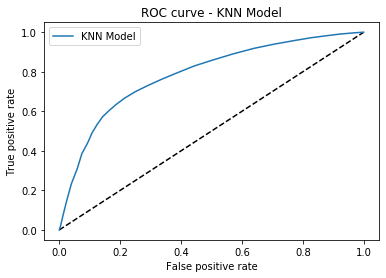

In [550]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN Model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

### 2.3 Support Vector Machine 
- **SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable.** A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.
- **In this section, we will use the Linear kernel and RBF kernel for the SVM classifier to identify the best kernel**: The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as Linear, Polynomial, Radial basis function and Sigmoid.

#### 2.3.1 Linear SVM 

####  2.3.1.1 Linear SVM Base Model
- A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
- Formula: K(x, xi) = sum(x * xi)

In [445]:
# Import the library for SVM Classifier
from sklearn import svm

#Build a SVM Classifier with a Linear base Kernel
svm_linear = svm.SVC(kernel='linear').fit(X_train, y_train)
yhat_linear = svm_linear.predict(X_test)
svm_linear = metrics.accuracy_score(y_test, yhat_linear)

In [449]:
print(f"Accuracy for base SVM_linear: {round(svm_linear*100, 2)}%")

Accuracy for base SVM_linear: 73.17%


#### 2.3.1.2 Linear SVM Sensitivity Analysis 
- **Parameter C**: 
    - **C controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data.**
    - In a SVM we are searching for two things - a hyperplane with the largest minimum margin and a hyperplane that correctly separates as many instances as possible. The problem is that we will not always be able to get both things. The C parameter determines how great our desire is for the latter. In other words, the C parameter tells the SVM optimization how much we want to avoid misclassifying each training example. 
- **The value of C**
   - Large values of C result in a wider margin, at the cost of some misclassifications. The optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.
   - Conversely, small value of C will result in the Hard Margin classifier and tolerates zero constraint violation. It will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. 

In [458]:
C = np.arange(0.05,1,0.05)
train_results_svm =[]
for n in C:
    model = svm.LinearSVC(C=n)
    model.fit(X_train, y_train)
    acc = cross_val_score(model, X_train, y_train, cv=10).mean()*100
    train_results_svm.append(acc)

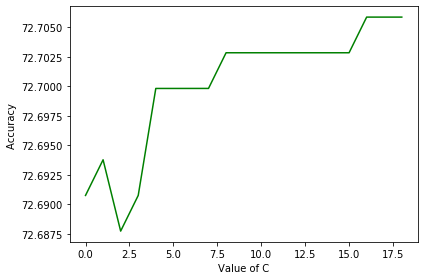

In [477]:
plt.plot(range(0,19),train_results_svm,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Value of C')
plt.tight_layout()
plt.show()

#### 2.3.1.3 Linear SVM Model Tuning

In [128]:
lin_clf = svm.LinearSVC()
lin_clf

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [130]:
bs = model_selection.ShuffleSplit(n_splits=25,test_size=0.3,random_state=0)
param_grid = {'C':[0.25,0.5,0.75,1],'penalty':['l2']}

gridbs = GridSearchCV(lin_clf,param_grid,cv=bs)
gridbs.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=25, random_state=0, test_size=0.3, train_size=None),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.25, 0.5, 0.75, 1], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [567]:
for key, val in gridbs.best_params_.items():
  print(f"Best hyperparameter is {key}: {val}")

Best hyperparameter is C: 0.25
Best hyperparameter is penalty: l2


In [497]:
best_svm_linear = gridbs.best_estimator_

#### 2.3.1.4 Linear SVM Performance Evaluation

In [556]:
y_pred_svml = best_svm_linear.predict(X_test)

#### Get Repeated Hold Out Accurary of Optimal Linear SVM 

- **Cross validation:** Use 10-fold Cross Validation to give a more accurate indication of how well the model generalizes to unseen data.
- **Model Performance Evaluation:** The model accuracy of the optimal SVM model is 72.43% 

In [551]:
svml_pipe = make_pipeline(best_svm_linear)
svml_pipe.fit(X_train, y_train)
pipe_pred = svml_pipe.predict(X_test)
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=16)
print('cv_acc_mean',round(cross_val_score(svml_pipe, X_train, y_train, cv=cv).mean(),4))
print('cv_acc_std',round(cross_val_score(svml_pipe, X_train, y_train, cv=cv).std(),4))

cv_acc_mean 0.7267
cv_acc_std 0.0058


#### Confusion Matrix

In [465]:
svml_confusion = pd.crosstab(y_test, y_pred_svml)
svml_confusion

col_0,0,1
Disease,,
0,5389,1549
1,2251,4986


In [582]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred_svml), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, y_pred_svml), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, y_pred_svml), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, y_pred_svml), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, y_pred_svml), 4)}")


Accuracy: 0.7307
Precision: 0.7592
Recall: 0.6919
F1-Score: 0.724
ROC AUC Score: 0.7315


In [466]:
print(metrics.classification_report(y_test, y_pred_svml))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6938
           1       0.76      0.69      0.72      7237

    accuracy                           0.73     14175
   macro avg       0.73      0.73      0.73     14175
weighted avg       0.73      0.73      0.73     14175



#### ROC Curve and AUC for Linear SVM 

In [469]:
# Use predict_proba to get the probability results of Linear SVM Model
y_pred_svml = best_svm_linear._predict_proba_lr(X_test)[:, 1]
fpr_svml, tpr_svml, thresh = roc_curve(y_test, y_pred_svml)

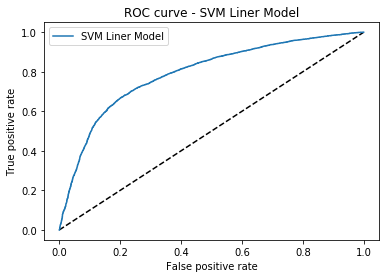

In [559]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svml, tpr_svml, label='SVM Liner Model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - SVM Liner Model')
plt.legend(loc='best')
plt.show()

#### 2.3.2 RBF SVM  
- The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.
- Formula: K(x,xi) = 1 + sum(x * xi)^d

#### RBF SVM Base Modele

In [446]:
# Build a SVM Classifier with a Radial base Function Kernel
svm_rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
yhat_rbf = svm_rbf.predict(X_test)
svm_rbf = metrics.accuracy_score(y_test, yhat_rbf)

In [450]:
print(f"Accuracy for base SVM_linear: {round(svm_rbf*100, 2)}%")

Accuracy for base SVM_linear: 73.25%


#### RBF SVM Model Tuning 
- **Parameter**: In RBF, gamma is a parameter, which ranges from 0 to 1.  The value of gamma needs to be manually specified in the learning algorithm.
- **Overfitting:** A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value.

#### 2.3.3 SVM with RBF Kernel Function: γ

In [494]:
from sklearn.model_selection import GridSearchCV

hyper = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'kernel':['rbf']
        }

gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)

gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 294.7min finished


0.7312613227261807
SVC(C=0.7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [568]:
for key, val in gd.best_params_.items():
  print(f"Best hyperparameter is {key}: {val}")

Best hyperparameter is C: 0.7
Best hyperparameter is gamma: 0.5
Best hyperparameter is kernel: rbf


In [498]:
best_svm_rbf = gd.best_estimator_

#### 2.3.1.4 RBF SVM Performance Evaluation

In [499]:
y_pred_svmr = best_svm_rbf.predict(X_test)

#### Get Repeated Hold Out Accurary of optimal RBF RBF Model

- **Cross validation:** Use 10-fold Cross Validation to give a more accurate indication of how well the model generalizes to unseen data.
- **Model Performance Evaluation:** The model accuracy of the KNN model is 72.43% 

#### Confusion Matrix

In [561]:
svmr_pipe = make_pipeline(best_svm_rbf)
svmr_pipe.fit(X_train, y_train)
pipe_pred = svmr_pipe.predict(X_test)
cv = KFold(n_splits=10, shuffle=True, random_state=16)
cross_val_score(svmr_pipe, X_train, y_train, cv=cv).mean()
print('cv_acc_mean',round(cross_val_score(svmr_pipe, X_train, y_train, cv=cv).mean(),4))
print('cv_acc_std',round(cross_val_score(svmr_pipe, X_train, y_train, cv=cv).std(),4))

cv_acc_mean 0.7311
cv_acc_std 0.0057


In [502]:
svml_confusion = pd.crosstab(y_test, y_pred_svmr)
svml_confusion

col_0,0,1
Disease,,
0,5454,1484
1,2302,4935


In [569]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred_svmr), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, y_pred_svmr), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, y_pred_svmr), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test,y_pred_svmr), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, y_pred_svmr), 4)}")

Accuracy: 0.7329
Precision: 0.7688
Recall: 0.6819
F1-Score: 0.7228
ROC AUC Score: 0.734


In [503]:
print(metrics.classification_report(y_test, y_pred_svmr))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6938
           1       0.77      0.68      0.72      7237

    accuracy                           0.73     14175
   macro avg       0.74      0.73      0.73     14175
weighted avg       0.74      0.73      0.73     14175



#### ROC Curve and AUC for RBF SVM

In [509]:
# Use predict_proba to get the probability results of KNN Model
fpr_svmr, tpr_svmr, thresh = roc_curve(y_test, y_pred_svmr)

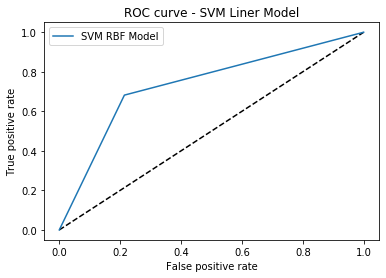

In [570]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svmr, tpr_svmr, label='SVM RBF Model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - SVM Liner Model')
plt.legend(loc='best')
plt.show()

### 2.4 Random Forest 
- The random forest is a classification algorithm consisting of many decisions trees. 
- It uses **bagging and feature randomness** when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.
-  It fits a number of decision tree classifiers on various sub-samples of the dataset and **uses averaging to improve the predictive accuracy and control over-fitting**. 

#### 2.4.1 Base Model: Random Forest
- We use 10-fold Cross Validation to get the accuracy for RF. 
- The base model has an accuracy of 69.83%.

In [364]:
# libraries
from sklearn.ensemble import RandomForestClassifier

# Random Forest
classifier_RF = RandomForestClassifier()

# Use 10-fold Cross Validation to get the accuracy for RF
cv_score = model_selection.cross_val_score(classifier_RF, X_train, y_train, cv=10)
print(cv_score)
print('Model accuracy of Random Forest is', str(cv_score.mean()))

[0.71 0.7  0.69 0.69 0.68 0.7  0.71 0.69 0.71 0.7 ]
Model accuracy of Random Forest is 0.6982735405349175


#### 2.4.2 Find Optimal Hyperparameter: Random Forest

#### Max_depth: train the model with different max depth ranging from 1 to 10 and calculate the accuracy of each model

In [374]:
md = 16
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))
for n in range(1,md):
    
    #Train Model and Predict  
    RF = RandomForestClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat_RF =RF.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_RF)

    
    std_acc[n-1]=np.std(yhat_RF==y_test)/np.sqrt(yhat_RF.shape[0])

mean_acc

array([0.71, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.74, 0.73, 0.74,
       0.74, 0.73, 0.73, 0.73])

#### Plot model accuracy for different number of max depth¶
- **Disucssion of overfitting and underfitting**: 
    - If we set max_depth too high, then the decision tree might simply overfit the training data without capturing useful patterns as we would like; this will cause testing error to increase. 
    - If we set it too low, that is not good as well; then we might be giving the decision tree too little flexibility to capture the patterns and interactions in the training data. This will also cause the testing error to increase.
    - There are some nice golden spots in between the extremes of too-high and too-low. As shown below, the optimal max_depth might be around 3 and 9.

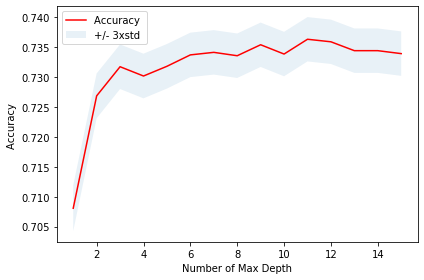

In [375]:
plt.plot(range(1,md),mean_acc,'r')
plt.fill_between(range(1,md),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Max Depth')
plt.tight_layout()
plt.show()

#### More efficient parameter tuning using GridSearchCV: RF
- **n_estimators:** The number of trees in the forest. The default value of n_estimators is 100.
- **criterion:** The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
- **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. 
- **max_features:** Max number of features considered for splitting a node
- **bootstrap:** method for sampling data points (with or without replacement) By default, it bootstrap = True

In [388]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [27,28,29,30,31],
    'criterion':['gini','entropy'],
    'max_depth': [ 8, 9, 10],
    'max_features':["auto","sqrt","log2"]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [389]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.7326824224297116
Best parameters set
criterion : entropy
max_depth : 10
max_features : sqrt
n_estimators : 30


In [390]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [391]:
best_RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 2.4.3 Model Performance Evaluation: RF

#### Get Repeated Hold Out Accurary of Optimal RF Model

- **Cross validation:** Use 10-fold Cross Validation to give a more accurate indication of how well the model generalizes to unseen data.
- **Model Performance Evaluation:** The model accuracy of the RF model is 73.11% 

In [564]:
rf_pipe = make_pipeline(best_RF_model)
rf_pipe.fit(X_train, y_train)
pipe_pred = rf_pipe.predict(X_test)
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=16)

In [563]:
print('cv_acc_mean',round(cross_val_score(rf_pipe, X_train, y_train, cv=cv).mean(),4))

cv_acc_mean 0.7296


In [562]:
print('cv_acc_std',round(cross_val_score(rf_pipe, X_train, y_train, cv=cv).std(),4))

cv_acc_std 0.006


#### Confusion Matrix

In [565]:
y_pred_rf = best_RF_model.predict(X_test)

In [566]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred_rf), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, y_pred_rf), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, y_pred_rf), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, y_pred_rf), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, y_pred_rf), 4)}")

Accuracy: 0.7356
Precision: 0.7717
Recall: 0.6847
F1-Score: 0.7256
ROC AUC Score: 0.7367


In [392]:
print(metrics.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6938
           1       0.77      0.68      0.72      7237

    accuracy                           0.73     14175
   macro avg       0.74      0.74      0.73     14175
weighted avg       0.74      0.73      0.73     14175



#### ROC and AUC for RF

In [393]:
# Use predict_proba to get the probability results of KNN Model
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresh = roc_curve(y_test, y_pred_rf)

In [394]:
# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8003074707411661

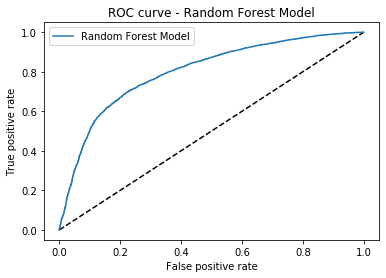

In [572]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest Model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Random Forest Model')
plt.legend(loc='best')
plt.show()

### 2.5 Gradient Boosting Machine 

#### 2.5.1 Base Model: GBM
- We use 10-fold Cross Validation to get the accuracy for GBM Base Model. 
- The base model has an accuracy of 73.40%.

In [438]:
from sklearn.ensemble import GradientBoostingClassifier as gbm
num_trees = 100
gbm_model = gbm(n_estimators=num_trees, random_state=16)
cv = 10 
results = cross_val_score(gbm_model, X_train, y_train, cv=cv)
print(f"Accuracy for GBM: {round(results.mean()*100, 2)}%")

Accuracy for GBM: 73.34%


#### 2.5.2 Model Tuning

#### Discussion on Overfitting for Gradient Boosting Machine:
- **We can generally address the overfitting for a gradient boosted machine in by**
    - Reducing the number of dependent features by removing all non-significant and correlated features from the data set.
    - Increasing the number of training examples.
- **At this stage it might not be possible to reduce features or increase size of training dataset. In such case we use regularisation to smoothen the cost function and reduce high variance and increase bias.**
   - Regularization via shrinkage (learning_rate < 1.0) improves performance considerably. 
   - In combination with shrinkage, stochastic gradient boosting (subsample < 1.0) can produce more accurate models by reducing the variance via bagging. 
   - Therefore, we experiment with subsample and learning rate.

#### More efficient parameter tuning using GridSearchCV: RF

- **loss**:loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.
-  **learning_rate**: learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. 
- **n_estimators**: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
-  **max_depth(default=3)**: maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
-  random_state=0
-  **subsample(default=1.0)**: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.

In [400]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': np.arange(0.02, 0.1, 0.02),
              'n_estimators': range(60, 160, 50),
              'max_depth': range(2, 10),
              'loss':['deviance','exponential'],
              'subsample':[1,0.5]}
clf = GridSearchCV(gbm(), param_grid)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [401]:
for key, val in clf.best_params_.items():
  print(f"Best hyperparameter is {key}: {val}")

Best hyperparameter is learning_rate: 0.06
Best hyperparameter is loss: deviance
Best hyperparameter is max_depth: 4
Best hyperparameter is n_estimators: 110
Best hyperparameter is subsample: 0.5


In [439]:
# best gradient boosting machine 
best_GBM_model = clf.best_estimator_

In [403]:
best_GBM_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.06, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=110,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### 2.5.3 Model Performance Evluation

#### Get Repeated Hold Out Accurary of Optimal GBM Model

- **Cross validation:** Use 10-fold Cross Validation to give a more accurate indication of how well the model generalizes to unseen data.
- **Model Performance Evaluation:** The model accuracy of the RF model is 73.42% 

In [575]:
gbm_pipe = make_pipeline(best_GBM_model)
gbm_pipe.fit(X_train, y_train)
pipe_pred = gbm_pipe.predict(X_test)
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=16)
cross_val_score(gbm_pipe, X_train, y_train, cv=cv).mean()

0.7332868811129081

In [577]:
print('cv_acc_mean',round(cross_val_score(gbm_pipe, X_train, y_train, cv=cv).mean(),4))

cv_acc_mean 0.7333


In [578]:
print('cv_acc_std',round(cross_val_score(gbm_pipe, X_train, y_train, cv=cv).std(),4))

cv_acc_std 0.0061


#### Confusion Matrix

In [573]:
y_pred_gbm = best_GBM_model.predict(X_test)

In [574]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred_gbm), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, y_pred_gbm), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, y_pred_gbm), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test,y_pred_gbm), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, y_pred_gbm), 4)}")

Accuracy: 0.7369
Precision: 0.7579
Recall: 0.712
F1-Score: 0.7343
ROC AUC Score: 0.7374


In [407]:
print(metrics.classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6938
           1       0.76      0.71      0.73      7237

    accuracy                           0.74     14175
   macro avg       0.74      0.74      0.74     14175
weighted avg       0.74      0.74      0.74     14175



#### ROC and AUC for GBM

In [408]:
# Use predict_proba to get the probability results of KNN Model
y_pred_gbm = best_GBM_model.predict_proba(X_test)[:, 1]
fpr_gbm, tpr_gbm, thresh = roc_curve(y_test, y_pred_gbm)

In [409]:
# AUC score
metrics.auc(fpr_gbm,tpr_gbm)

0.8026573867126005

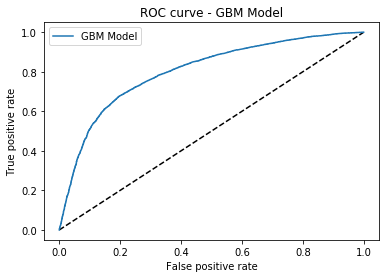

In [580]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gbm, tpr_gbm, label='GBM Model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - GBM Model')
plt.legend(loc='best')
plt.show()

## Section 3: Predcition and Interpretation

### 3.1 Load and Process Testing Data
- The training and testing data should undergo the same data preparation steps or the predictive model will not make sense.

#### Test_df Basic Info

In [414]:
# test_df
print('Number of rows:', test_df.shape[0])
print('Number of columns:', test_df.shape[1])

# rename the high and low blood pressure columns
test_df.rename(columns={'High Blood Pressure':'High_Blood_Pressure',
                         'Low Blood Pressure':'Low_Blood_Pressure'},inplace=True)
# print test_df
test_df.head(3)

Number of rows: 21000
Number of columns: 11


,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise
ID,,,,,,,,,,,
0,44,female,160,59.0,100,80,high,normal,0,0,1
1,41,female,169,74.0,120,70,normal,normal,0,0,1
2,63,male,168,84.0,120,80,normal,high,0,0,1


#### Missing values 

In [415]:
# check for missing values 
test_df.isnull().sum(axis=0)

Age                    0
Gender                 0
Height                 0
Weight                 0
High_Blood_Pressure    0
Low_Blood_Pressure     0
Cholesterol            0
Glucose                0
Smoke                  0
Alcohol                0
Exercise               0
dtype: int64

#### Duplicates

In [417]:
# check for duplicates 
if test_df.duplicated().sum()==0:
    print('No duplicated rows')
else:
    print('There are duplicates rows in the dataset.')
test_df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", test_df.shape[0])
print("Number of duplicate rows removed:", 21000-test_df.shape[0])

No duplicated rows
Number of rows after removing duplicates: 20434
Number of duplicate rows removed: 566


#### Outliers

In [418]:
# preprocess outliers 
outliers_cols = ['Age','Height','Weight','High_Blood_Pressure','Low_Blood_Pressure']
for target_col in outliers_cols:
    '''
    For each numeric column, we use IQR method to identify outliers.
    Column values higher than the upper bound are set to upper bound values.
    Column values lower thatn the lower bound value are set to lower bound values.
    
    '''
    lower_quartile = test_df[target_col].quantile(0.25)
    upper_quartile = test_df[target_col].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    outlier_thresh = 1.5 * IQR
    # get upper/lower bound
    upper_bound = lower_quartile + outlier_thresh
    lower_bound = lower_quartile - outlier_thresh
    # winsorization
    test_df[target_col].loc[test_df[target_col] > upper_bound] = upper_bound
    test_df[target_col].loc[test_df[target_col] < lower_bound] = lower_bound


/Users/jieerchen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Negative values 

In [419]:
# number of rows with negative values in High_Blood_Pressure
negative_values = sum( n <0 for n in test_df['High_Blood_Pressure'].values.flatten())
print("Number of negatives values in High Blood Pressure Column:", negative_values)

Number of negatives values in High Blood Pressure Column: 0


#### Feature Encoding 

In [420]:
# categorical variables
test_df['Gender'] = test_df['Gender'].map({'male': 0, 'female': 1})
test_df = pd.get_dummies(test_df, columns=['Cholesterol'])
test_df = pd.get_dummies(test_df, columns=['Glucose'])

#### Ready for Prediction Data

In [421]:
# test_df
print('Number of rows:', test_df.shape[0])
print('Number of columns:', test_df.shape[1])
test_df.head(3)

Number of rows: 20434
Number of columns: 15


,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Smoke,Alcohol,Exercise,Cholesterol_high,Cholesterol_normal,Cholesterol_too high,Glucose_high,Glucose_normal,Glucose_too high
ID,,,,,,,,,,,,,,,
0,44.0,1,160.0,59.0,100.0,80.0,0,0,1,1,0,0,0,1,0
1,41.0,1,169.0,74.0,120.0,70.0,0,0,1,0,1,0,0,1,0
2,63.0,0,168.0,84.0,120.0,80.0,0,0,1,0,1,0,1,0,0


#### Data Scaling 

In [425]:
from sklearn.preprocessing import MinMaxScaler
X_testset = test_df
X_testset = preprocessing.MinMaxScaler().fit(X_testset).transform(X_testset)
X_testset[0:2]

array([[0.37, 1.  , 0.53, 0.38, 0.17, 0.5 , 0.  , 0.  , 1.  , 1.  , 0.  ,
        0.  , 0.  , 1.  , 0.  ],
       [0.27, 1.  , 0.8 , 0.68, 0.5 , 0.17, 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 0.  , 1.  , 0.  ]])

### 3.3 Make Prediction 

#### NBC: Guassian Navie Bayes

In [602]:
NBC = gnb.predict(X_testset)
NBC[0:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

#### KNN

In [603]:
KNN = best_KNN_model.predict(X_testset)
KNN[0:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1])

#### SVM-Linear

In [604]:
SVM_Linear = best_svm_linear.predict(X_testset)
SVM_Linear[0:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1])

#### SVM-RBF

In [606]:
SVM_RBF = best_svm_rbf.predict(X_testset)
SVM_RBF[0:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1])

#### RF: Random Forest

In [434]:
RF = best_RF_model.predict(X_testset)
RF[0:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

#### GBM: Gradient Boosting Machine

In [607]:
GBM = best_GBM_model.predict(X_testset)
GBM[0:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1])

#### Output prediction result as a CSV file¶

In [608]:
output_df = pd.read_csv('Disease Prediction Testing.csv')
prediction = pd.DataFrame(list(zip(output_df['ID'], NBC,KNN,SVM_Linear,SVM_RBF,RF,GBM)),columns=['ID','NBC','KNN','SVM-Linear','SVM-RBF','RF','GBM'])
prediction.to_csv('Disease_Prediction.csv')

In [609]:
prediction.head(10)

,ID,NBC,KNN,SVM-Linear,SVM-RBF,RF,GBM
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,1,0,1,0,1,1
3,3,1,1,1,1,1,1
4,4,0,0,0,0,0,0
5,5,0,1,1,1,0,1
6,6,0,0,0,0,0,0
7,7,1,1,1,1,1,1
8,8,1,1,1,1,1,1
9,9,1,1,1,1,1,1


### 3.3 Model Performance Summary and Interpretation

In [631]:
model_performance = {'Metrics': ['Accuracy','Precision','Recall','F1-Score','CV_mean','CV_std','ROC_AUC','Parameters'], 
           'Gussain': [0.6874, 0.7367,0.6034,0.6634,0.6885,0.0108,0.6892,'None'],
           'KNN':[0.7307,0.7592,0.6919,0.724,0.7243,0.0064,0.7248,'metric : manhattan,n_neighbors : 29,weights : uniform'],
           'SVM_Linear':[0.7307,0.7592,0.6919,0.724,0.7267,0.0058,0.7315,'penalty: l2,C: 0.25'],
           'SVM_RBF':[0.7329,0.7688,0.6819,0.7228,0.7311,0.0057,0.7340,'C: 0.7,gamma: 0.5'],  
           'RF':[0.7356,0.7717,0.6847,0.7256,0.7296,0.006,0.7367,'criterion : entropy,max_depth : 10,max_features : sqrt,n_estimators : 30'],
           'GBM':[0.7369, 0.7579,0.712,0.7343,0.7333,0.0061, 0.7374,'learning_rate: 0.06,loss: deviance,max_depth: 4,n_estimators: 110,subsample: 0.5']}
                  
model_performance = pd.DataFrame(data= model_performance)
model_performance.set_index('Metrics',inplace=True)

#### 3.3.2 Summary and Interpretation of each Individual Model

#### 1. Summary and Interpretation of each Individual Model: Navie Bayes Algorithm

In [593]:
nym_performance 

,Metrics,Gussain,Multilnomial,Bernoulli
0,Accuracy,0.6874,0.6140,0.5898
1,Precision,0.7367,0.6851,0.6651
2,Recall,0.6034,0.4513,0.3960
3,F1-Score,0.6634,0.5442,0.4964
4,CV_mean,0.6885,0.6109,0.5882
5,CV_std,0.0108,0.0111,0.0100
6,AUC,0.6892,0.6175,0.5940


- **Gussain NB model has outperformed the other two model given that it has the highest values for Accuracy(0.6874), Precision(0.7367), Recall(0.6034) and largest AUC (0.6892).** 
     - **Accuracy**: 0.74% of the predictions made by the model are correct.
     - **Precision** (0.60 for disease = 1): 60% of the cases are correctly predicted among all the cases that are predicted as having disease.
     - **Recall** (0.66 for disease =1): 66% of the cases are correctly identified by the model among all the cases are diagnoised with disease 
     - **F-1 score 0.66**: F-1 score is 66%. It takes into consideration of both Precision and Recall.
     - **AUC**: Gussain NB model has the largest area under the curve: 0.76, indicating that Gussain NB model is the most useful among all.
     - **Cross validation accuracy (mean & std)**: we also observe that the variations of model accuracy for each model is small and that they have relatively unbaised performance and low variances.
- **Adtional Comments on the NB model Performance**
    - Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. However, in real life, it is almost impossible that we get a set of predictors which are completely independent. 
    - According to our previous correlation matrix, we see that many of our variables are correlated with others. This could be one of the reason that we are not achieving higher accuracy that we've got.

#### 2. Summary and Interpretation: KNN 

In [601]:
model_performance[['KNN']]

,KNN
Metrics,
Accuracy,0.7307
Precision,0.7592
Recall,0.6919
F1-Score,0.724
CV_mean,0.7243
CV_std,0.0064
ROC_AUC,0.7248
Parameters,"metric : manhattan,n_neighbors : 29,weights : uniform"


- **Confusion Matrices**
     - **Accuracy**: around 73.07% of the predictions made by the model are correct.
     - **Precision** (0.7592 for disease = 1): around 75.92% of the cases are correctly predicted among all the cases that are predicted as having disease.
     - **Recall** (0.6919 for disease =1): around 69.19% of the cases are correctly identified by the model among all the cases are diagnoised with disease 
     - **F-1 score 0.72**: F-1 score is 0.724. It takes into consideration of both Precision and Recall.
- **ROC curve and AUC score**
    - **Result**: The AUC of the best KNN model is around 0.0064.
- **Cross-validation to help in identifying a case of overfitting**
    - **Result:** The average accuracy is around 0.7248. 

#### 3. Summary and Interpretation: SVM

In [600]:
model_performance[['SVM_Linear','SVM_RBF']]

,SVM_Linear,SVM_RBF
Metrics,,
Accuracy,0.7307,0.7329
Precision,0.7592,0.7688
Recall,0.6919,0.6819
F1-Score,0.724,0.7228
CV_mean,0.7267,0.7311
CV_std,0.0058,0.0057
ROC_AUC,0.7315,0.734
Parameters,"penalty: l2,C: 0.25","C: 0.7,gamma: 0.5"


#### SVM Linear and SVM RBF has very close performance. If we give more weight to cross validation accuracy and AUC score, SVM RBF perform slightly better than SVM Linear. 
- **Confusion Matrix**
    - SCM Linear has higher precission while SVM RBF has higher recall. Therefore, we would look at the F1-score which takes into consideration of both precision and recall. As a reseult, SVM Linear has sightly better performance.
- **Cross-validation to help in identifying a case of overfitting**
    - **Result:** SVM RBF has a higher cross valiation mean accuarcy score (0.7311 compared to 0.0058) and lower cross validation standard deviation accuracy score(0,0057 compared to 0.7267). 
- **ROC curve and AUC score**
    - **Result**: The AUC of the best SVM model is around 0.734.

#### 4 Summary and Interpretation: RF

In [611]:
model_performance[['RF']]

,RF
Metrics,
Accuracy,0.7356
Precision,0.7717
Recall,0.6847
F1-Score,0.7256
CV_mean,0.7296
CV_std,0.006
ROC_AUC,0.7367
Parameters,"criterion : entropy,max_depth : 10,max_features : sqrt,n_estimators : 30"


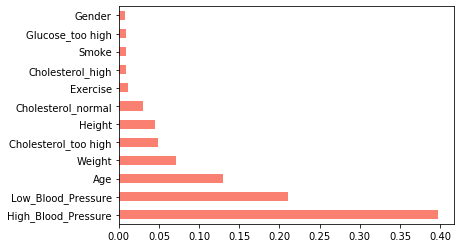

In [398]:
importances = best_RF_model.feature_importances_
X_index = train_df.drop('Disease',axis=1)
feat_importances = pd.Series(best_RF_model.feature_importances_, index=X_index.columns)
feat_importances.nlargest(12).plot(kind='barh',color="salmon")

In [397]:
std = np.std([best_RF_model.feature_importances_ for tree in best_RF_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 4 (0.396965)
2. feature 5 (0.210927)
3. feature 0 (0.130146)
4. feature 3 (0.071704)
5. feature 11 (0.049116)
6. feature 2 (0.045143)
7. feature 10 (0.029585)
8. feature 8 (0.010802)
9. feature 9 (0.008827)
10. feature 6 (0.008689)
11. feature 14 (0.008522)
12. feature 1 (0.008306)
13. feature 7 (0.007921)
14. feature 13 (0.007527)
15. feature 12 (0.005820)


**Performance Summary**
- **Confusion Matrices**
     - **Accuracy**: 0.73.56% of the predictions made by the model are correct.
     - **Precision** (0.77.17 for disease = 1): 77.17% of the cases are correctly predicted among all the cases that are predicted as having disease.
     - **Recall** (0.6847 for disease =1): 68.47% of the cases are correctly identified by the model among all the cases are diagnoised with disease 
     - **F-1 score 0.7256**: F-1 score is 72%. It takes into consideration of both Precision and Recall.
- **ROC curve and AUC score**
    - **Result**: The AUC of the best RF model is around 0.7367.
- **Cross-validation to help in identifying a case of overfitting**
    - **Result:** The average accuracy is 0.7296. 
- **RF suggests that 6 features are informative, while the remaining are not. These features and their relative importance are**
    1. **High_Blood_Pressure**: 0.396965
    2. **Low_Blood_PressureWeight**: 0.210927
    3. **Age**: 0.130146
    4. **Weight**: 0.071704
    5. **Cholesterol_too high**: 0.049116
    6. **Height**: 0.045143

#### 3.3.5  Summary and Interpretation: GBM

In [613]:
model_performance[['GBM']]

,GBM
Metrics,
Accuracy,0.7369
Precision,0.7579
Recall,0.712
F1-Score,0.7343
CV_mean,0.7333
CV_std,0.0061
ROC_AUC,0.7374
Parameters,"learning_rate: 0.06,loss: deviance,max_depth: 4,n_estimators: 110,subsample: 0.5"


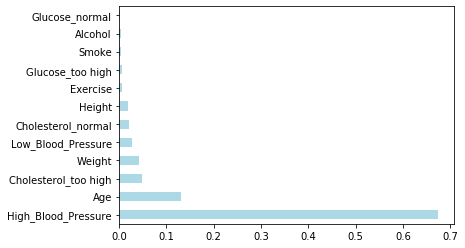

In [630]:
importances_gbm = best_GBM_model.feature_importances_
X_index = train_df.drop('Disease',axis=1)
feat_importances_gbm = pd.Series(best_GBM_model.feature_importances_, index=X_index.columns)
feat_importances_gbm.nlargest(12).plot(kind='barh',color="lightblue")

In [629]:
std = np.std([best_GBM_model.feature_importances_ for tree in best_GBM_model.estimators_],
             axis=0)
indices = np.argsort(importances_gbm)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances_gbm[indices[f]]))

Feature ranking:
1. feature 4 (0.673581)
2. feature 0 (0.130931)
3. feature 11 (0.048845)
4. feature 3 (0.043179)
5. feature 5 (0.028067)
6. feature 10 (0.021341)
7. feature 2 (0.020415)
8. feature 8 (0.007134)
9. feature 14 (0.006256)
10. feature 6 (0.005230)
11. feature 7 (0.004718)
12. feature 13 (0.003354)
13. feature 12 (0.003182)
14. feature 1 (0.002442)
15. feature 9 (0.001326)


- **Confusion Matrices**
     - **Accuracy**: 0.74% of the predictions made by the model are correct.
     - **Precision** (0.76 for disease = 1): 70% of the cases are correctly predicted among all the cases that are predicted as having disease.
     - **Recall** (0.71 for disease =1): 72% of the cases are correctly identified by the model among all the cases are diagnoised with disease 
     - **F-1 score 0.73**: F-1 score is 72%. It takes into consideration of both Precision and Recall.
- **ROC curve and AUC score**
    - **Result**: The AUC of the best KNN model is around 0.8027.
- **cross-validation to help in identifying a case of overfitting**
    - **Result:** The average accuracy is 0.7341. 
- **GMB suggests that 4 features are informative, while the remaining are not. These features and their relative importance are**
    1. **High_Blood_Pressure**: 0.673581
    2. **Age**: 0.130931
    3. **Cholesterol_too high**: 0.048845
    4. **Weight**: 0.043179

#### 3.3.1 Table Summary of Model Preformance: best NB, KNN, SVM, RF and GMB

#### Table Summary

In [592]:
model_performance

,Gussain,KNN,SVM_Linear,SVM_RBF,RF,GBM
Metrics,,,,,,
Accuracy,0.6874,0.7307,0.7307,0.7329,0.7356,0.7369
Precision,0.7367,0.7592,0.7592,0.7688,0.7717,0.7579
Recall,0.6034,0.6919,0.6919,0.6819,0.6847,0.712
F1-Score,0.6634,0.724,0.724,0.7228,0.7256,0.7343
CV_mean,0.6885,0.7243,0.7267,0.7311,0.7296,0.7333
CV_std,0.0108,0.0064,0.0058,0.0057,0.006,0.0061
ROC_AUC,0.6892,0.7248,0.7315,0.734,0.7367,0.7374
Parameters,None,"metric : manhattan,n_neighbors : 29,weights : uniform","penalty: l2,C: 0.25","C: 0.7,gamma: 0.5","criterion : entropy,max_depth : 10,max_features : sqrt,n_estimators : 30","learning_rate: 0.06,loss: deviance,max_depth: 4,n_estimators: 110,subsample: 0.5"


#### Interpretation

- **We have used Confusion Matrix to gain a comprehensive understanding of model performance. It gives direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.**
    - In this disease prediction case, we have a balanced training dataset given that Disease = 1 and Disease = 0 accounts for around 50% of the cases respectively. This means that looking at Accuracy score is a fair way to evaluate model performance. Although GBM has the highest accuract score(0.7369), here all models have very close accuracy scores so we can't really tell them apart. 
    - Therefore, we need to also look at the recall score given that doctors want to correctly diagnosed people with disease as having disease as much as possible in reality. We see that GBM has the highest Recall (0.712) while the recall of other models are below 0.7. Addtionaly, GBM have the highest F1-score(0.7256). 
    - Till now, we can carefully conclude that GBM has the best model performance under the confusion matrix evluation method.
- **We have used cross-validation to help us in identifying a case of overfitting.**
    - Cross validation is to build an estimator against different cross sections of your data to gain an aggregate understanding of performance across all sections. It estimate the model’s predictive performance on unseen data by repeating the experiment multiple times and using all the different parts of the training set as validation sets. This gives a more accurate indication of how well the model generalizes to unseen data.
    - All our models seems to have unbasied and low variance performance with a cross validation mean accuracy of around 0.7 and a cross validation standard deviation of around 0.006. 
    - GBM algorithm has the highest mean accuracy of 0.7333
- **We haved used ROC curve and AUC score to compare the usefulness of our models.**
    - ROC curves are frequently used to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests. As for AUV, AUC is a measure of the usefulness of a test in general, where a greater area means a more useful test, the areas under ROC curves are used to compare the usefulness of tests.
    - GBM has the highest ROC_AUC score 0.7374, closely followed by that of RF 0.7367.
- **Overall, we can conculde that the GBM model has the higest performance among all algorithms.**